In [107]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt


In [108]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [109]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [110]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [111]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [112]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(results, columns=['date','temperature'])
#june_temp_df.set_index(june_temp_df['date'], inplace=True)

june_temp_df.head()

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [113]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [114]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [115]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [116]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp_df = pd.DataFrame(dec_results, columns=['date','temperature'])

Dec_temp_df.head(10)

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [117]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Analysis

In [118]:
june_dec_df = pd.concat([june_temp_df, Dec_temp_df], axis=1)
print (june_dec_df)

            date  temperature        date  temperature
0     2010-06-01         78.0  2010-12-01         76.0
1     2010-06-02         76.0  2010-12-03         74.0
2     2010-06-03         78.0  2010-12-04         74.0
3     2010-06-04         76.0  2010-12-06         64.0
4     2010-06-05         77.0  2010-12-07         64.0
...          ...          ...         ...          ...
1695  2017-06-26         79.0         NaN          NaN
1696  2017-06-27         74.0         NaN          NaN
1697  2017-06-28         74.0         NaN          NaN
1698  2017-06-29         76.0         NaN          NaN
1699  2017-06-30         75.0         NaN          NaN

[1700 rows x 4 columns]


In [119]:
column_names = (['Date', 'June Temperature', 'Date', 'December Temperature'])

In [120]:
june_dec_df.columns=column_names
june_dec_df

,Date,June Temperature,Date,December Temperature
0,2010-06-01,78.0,2010-12-01,76.0
1,2010-06-02,76.0,2010-12-03,74.0
2,2010-06-03,78.0,2010-12-04,74.0
3,2010-06-04,76.0,2010-12-06,64.0
4,2010-06-05,77.0,2010-12-07,64.0
...,...,...,...,...
1695,2017-06-26,79.0,NaN,NaN
1696,2017-06-27,74.0,NaN,NaN
1697,2017-06-28,74.0,NaN,NaN
1698,2017-06-29,76.0,NaN,NaN


In [121]:
june_dec_df.dropna()

,Date,June Temperature,Date,December Temperature
0,2010-06-01,78.0,2010-12-01,76.0
1,2010-06-02,76.0,2010-12-03,74.0
2,2010-06-03,78.0,2010-12-04,74.0
3,2010-06-04,76.0,2010-12-06,64.0
4,2010-06-05,77.0,2010-12-07,64.0
...,...,...,...,...
1512,2011-06-14,71.0,2016-12-27,71.0
1513,2011-06-15,73.0,2016-12-28,71.0
1514,2011-06-16,72.0,2016-12-29,69.0
1515,2011-06-17,74.0,2016-12-30,65.0


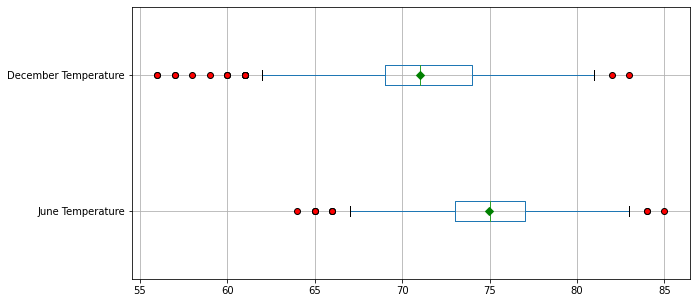

In [122]:
# Changing the outlier markers & Adding the mean
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

june_dec_df.boxplot(column=["June Temperature", "December Temperature"], vert=False,  flierprops=red_circle, showmeans=True, meanprops=mean_shape, figsize= (10,5)) 
plt.show()

In [123]:
# Filters the Measurement table to retrieve the precipation for the month of June, convert to a list
# create a datafram
session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all() 
june_rain_df = pd.DataFrame(results, columns=['Date','June Rainfall'])

june_rain_df

,Date,June Rainfall
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [124]:
june_rain_df['Date']= pd.to_datetime(june_rain_df['Date']) 
june_rainfall_total = june_rain_df.groupby(june_rain_df['Date'].dt.year).agg({'June Rainfall':sum})
print(june_rainfall_total)


      June Rainfall
Date               
2010           9.80
2011          50.91
2012          18.83
2013          29.56
2014          24.75
2015          23.53
2016          36.73
2017          20.52


In [125]:
session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all() 
dec_rain_df = pd.DataFrame(results, columns=['Date','December Rainfall'])
dec_rain_df

,Date,December Rainfall
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [126]:
dec_rain_df['Date']= pd.to_datetime(dec_rain_df['Date']) 
dec_rainfall_total = dec_rain_df.groupby(dec_rain_df['Date'].dt.year).agg({'December Rainfall':sum})
print(dec_rainfall_total)

      December Rainfall
Date                   
2010             105.59
2011              43.34
2012              18.10
2013              36.00
2014              38.63
2015              27.46
2016              35.51


In [127]:
merge_df = june_rainfall_total.merge(dec_rainfall_total, how='inner', on='Date')
print(merge_df)

      June Rainfall  December Rainfall
Date                                  
2010           9.80             105.59
2011          50.91              43.34
2012          18.83              18.10
2013          29.56              36.00
2014          24.75              38.63
2015          23.53              27.46
2016          36.73              35.51


<function matplotlib.pyplot.show(close=None, block=None)>

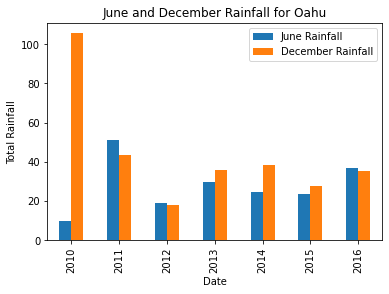

In [106]:
merge_df.plot.bar(title="June and December Rainfall for Oahu")
plt.ylabel("Total Rainfall")
plt.show